In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [36]:
dimensions = [2, 5, 20, 500, 2000]
num_vectors_multi = [1, 2, 5]
samplings = 10

def sum_interference(dimensions, num_vectors):
    vectors = np.random.randn(dimensions, num_vectors)
    #normalize the vectors
    vectors = vectors / np.linalg.norm(vectors, axis=0)

    dot_products = np.abs(vectors.T @ vectors)

    # Create a mask for the upper triangle of the matrix
    mask = np.tril(dot_products, k=0)

    lower_diag = mask - np.eye(num_vectors)

    sum = np.sum(lower_diag[lower_diag != 0])

    return sum / num_vectors

data = []

for dimension in dimensions:
    norm = None
    for idx, vec_mult in enumerate(num_vectors_multi):
        num_vecs = dimension * vec_mult
        mean_interferences = np.mean([sum_interference(dimension, num_vecs) for _ in range(samplings)])
        if idx == 0:
            norm = mean_interferences
        data.append((dimension, vec_mult, mean_interferences))
        


In [37]:
data

[(2, 1, np.float64(0.374500467723628)),
 (2, 2, np.float64(0.9360522363733337)),
 (2, 5, np.float64(2.8895263011337584)),
 (5, 1, np.float64(0.6404707335913876)),
 (5, 2, np.float64(1.665515448574346)),
 (5, 5, np.float64(4.426356658745734)),
 (20, 1, np.float64(1.7713876446596402)),
 (20, 2, np.float64(3.516102622010822)),
 (20, 5, np.float64(8.990417165034803)),
 (500, 1, np.float64(8.905422693710946)),
 (500, 2, np.float64(17.824956052263527)),
 (500, 5, np.float64(44.60865474848019)),
 (2000, 1, np.float64(17.833266635600797)),
 (2000, 2, np.float64(35.678264687250746)),
 (2000, 5, np.float64(89.2056763122889))]

In [41]:
samples = 500
dimension = [100, 10000, 1000000]
data = []
for d in tqdm.tqdm(dimension):
    res = 0
    for _ in range(samples):
        v1, v2 = np.random.randn(2, d)
        v1 = v1 / np.linalg.norm(v1)
        v2 = v2 / np.linalg.norm(v2)
        res += abs(np.dot(v1, v2))

    data.append(res / samples)


100%|██████████| 3/3 [00:16<00:00,  5.56s/it]


In [42]:
data

[np.float64(0.08317448801169593),
 np.float64(0.007559108421568545),
 np.float64(0.0007844490711069094)]

Text(0.5, 1.0, 'Average Dot Product of Random Vectors')

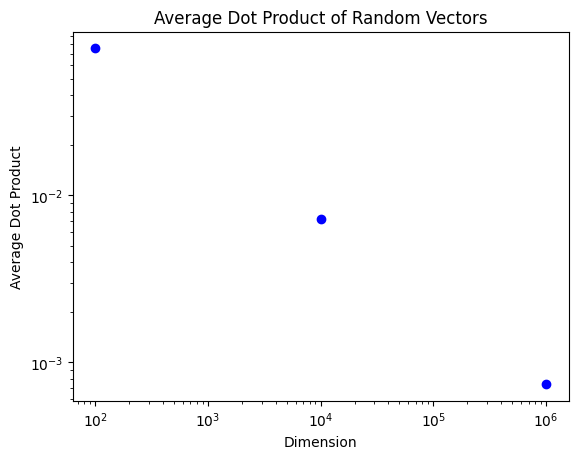

In [40]:
fig, ax = plt.subplots()
# Create a scatter plot
ax.scatter(dimension, data, color='blue', label='Average Dot Product')
#dimensions on a log scale
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Dimension')
plt.ylabel('Average Dot Product')
plt.title('Average Dot Product of Random Vectors')

# fuck yeah